In [141]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import hsv_to_rgb
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.patches import Rectangle

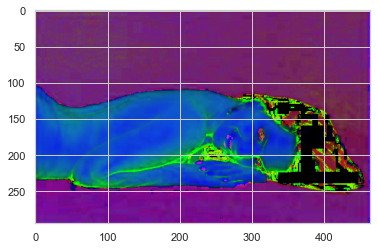

In [178]:
nudez = cv2.imread('./images/nudez.jpg')
nudez = cv2.cvtColor(nudez, cv2.COLOR_BGR2HSV)
plt.imshow(nudez)
plt.show()

In [171]:
nudez.shape

(295, 464, 3)

### Pega H e S dos recortes de pele

H, hue in OpenCV varies from 0 to 180, but in the outer world it is usually measured in degrees from 0 to 360, so to get the H of your color h = 97.5° / 2 = 48.7

S and V are measured from 0 ( = 0% in outer world) to 255 ( = 100% in outer world), so

s = 255 * 5.1% = 13
v = 255 * 61.57% = 157

https://stackoverflow.com/questions/57469394/opencv-choosing-hsv-thresholds-for-color-filtering

OBS: escala do OPENCV é diferente

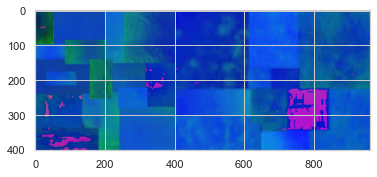

In [123]:
paleta = cv2.imread('./images/recorte_pele.jpg')
paleta = cv2.cvtColor(paleta, cv2.COLOR_BGR2HSV)
plt.imshow(paleta)
plt.show()

In [124]:
all_hsv_codes = paleta.reshape(-1, paleta.shape[-1])
all_hs_codes = [[h,s] for h,s,v in all_hsv_codes]
unique_hs = np.unique(all_hs_codes, axis=0)

In [153]:
unique_hs_x = [h*2 for h,s in unique_hs]
unique_hs_y = [s/255 for h,s in unique_hs]

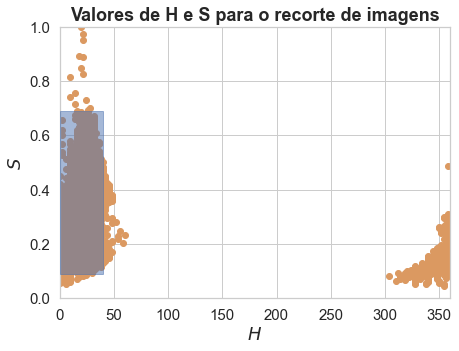

In [161]:
fig = plt.figure(figsize = (7,5))
sns.set_theme(style = 'whitegrid')

plt.xlabel('$H$', fontsize = 18)
plt.ylabel('$S$', fontsize = 18)

plt.xlim(0,360)
plt.ylim(0,1)

plt.scatter(unique_hs_x,unique_hs_y,c = '#DB9961')

plt.title(
    f'Valores de H e S para o recorte de imagens',
    fontsize= 18,
    fontweight = 'bold',
    y = 1
) 

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

# Adicionando faixa de interesse
# Valor real (Open CV): H[0,20] e S[25,180]
plt.gca().add_patch(
   Rectangle(
       (0,0.09),
       40,
       0.6,
       fill=True, 
       color='b', 
       alpha=0.5, 
       zorder=100, 
       figure=fig
       )
   )

plt.savefig(
    f'./graficos/distribuicao_H_S.pdf',
    dpi=1200,
    bbox_inches='tight'
)

### Aplica máscara

In [184]:
x = nudez.shape[0]
y = nudez.shape[1]

mask = np.zeros((x+1,y+1),float)

for i in range(0,x):
    for j in range(y):

        h,s,v = nudez[i,j,:]

        if (0 <= h <= 20) and (25 <= s <= 180):

            mask[i,j] = 1

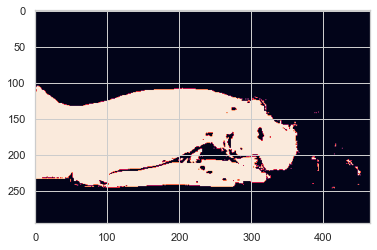

In [185]:
plt.imshow(mask)
plt.show()